# FrozenLake - Pippi case

Pippi was building a snowman in a park with Mr. Nilsson, when Mr. Nilsson suddenly ran over a frozen lake. This lake is not all frozen, but contains a few holes. How can Pippi rescue Mr. Nilsson without falling into a hole? In this case, we focus on the reunion of Pippi and Mr. Nilsson. We suppose that when Pippi and Mr. Nilsson are reunited, they'll manage to safely return to the snowman.

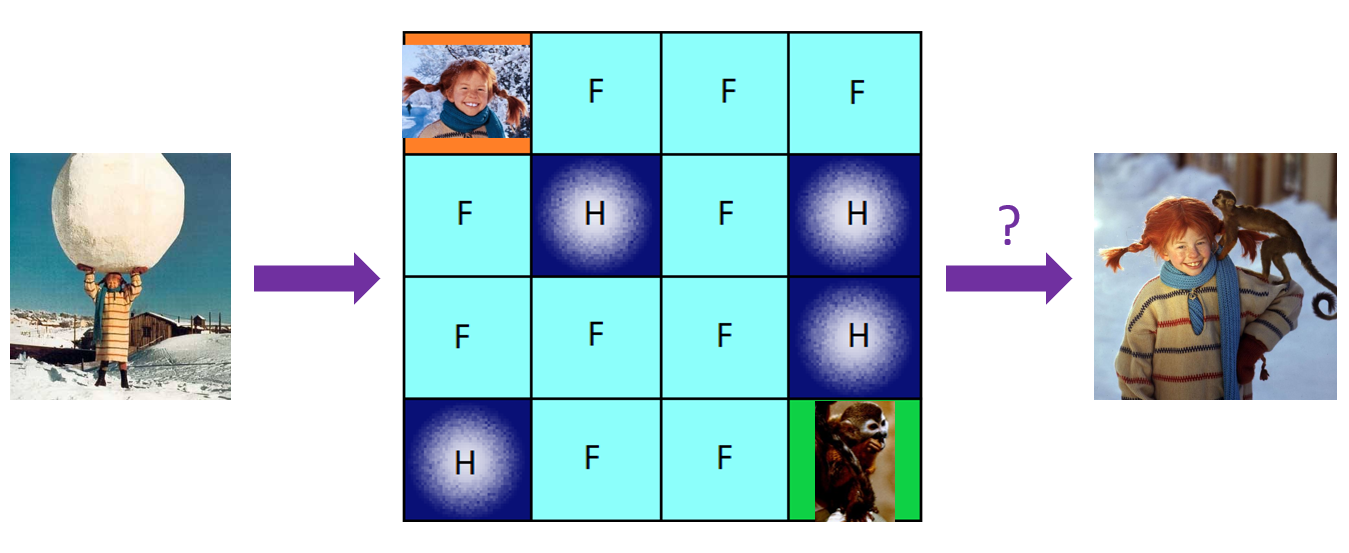

## Part 1 - FrozenLake as a Reinforcement Learning Problem










*   What are the different states?
*   What are the different actions Pippi can take?
*   What is the reward?

### Answers part 1


In [1]:
# imports
import gym
import torch
import time
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'gym'

In [ ]:
# create environment, print environment
env = gym.make('FrozenLake-v0', is_slippery=False)

# print environment
print('S = Start, F = Frozen, H = Hole, G = Goal')
env.render() 

In [ ]:
# print answers to the questions
number_of_states = env.observation_space.n
number_of_actions = env.action_space.n

print('Number of states:', number_of_states)
print('Number of actions:', number_of_actions)
print('Reward: 1 if Pippi reaches Mr. Nilsson, 0 if Pippi does not reach Mr. Nilsson (= Pippi has fallen into a hole or she has reached a maximum number of steps she can take)')

## Part 2 - Learning Q-values using the ϵ-greedy algorithm

Our goal is to learn Q-values such that Pippi can navigate safely to Mr. Nilsson, where a Q-value describes the value of an action, given a specific state. Let's create a table in which we initialize the Q-values.

In [ ]:
import numpy as np
Q = np.zeros([env.observation_space.n, env.action_space.n])
print(Q)

After every action, we will update the Q-values using the equation below. 

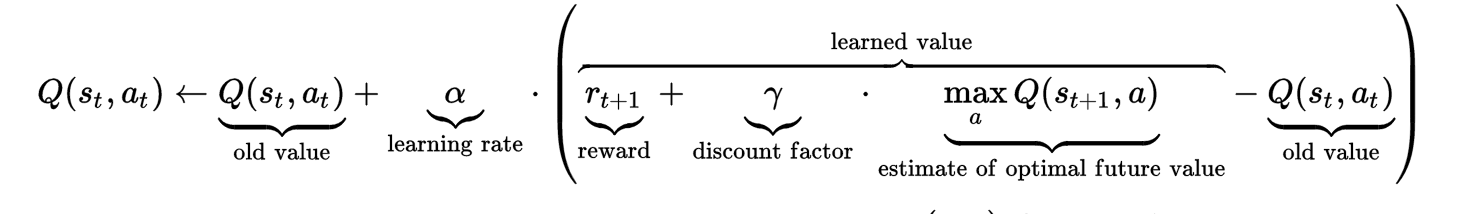

The equation above requires a learning rate and a discount factor. The *learning rate* reflects the trade-off between picking a value of the new Q-value based on past experience (alpha = 0) or the current situation (alpha = 1). The *discount factor* accounts for the reward the agent receives on an action and reflects the trade-off between accounting for the current reward (gamma = 0) and the future rewards (gamma = 1).

 We initialize these parameters below.

In [ ]:
alpha = 0.9 # learning rate
gamma = 0.95 # discount factor 

Moreover, the update rule relies on the chosen action. We choose actions using the ϵ-greedy algorithm. This algorithm uses the trade-off between exploring random actions and exploiting current estimations of the Q-values. With probability ϵ the algorithm chooses exploration (a random action); with probability 1 - ϵ the algorithm chooses exploitation (action with highest Q-value). The algorithm is visualized below.

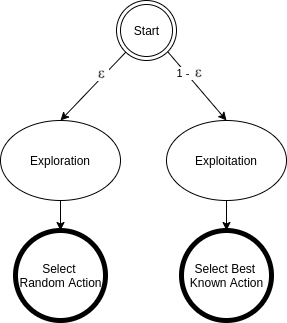

We initialize epsilon below. We start with 100% random actions to explore the environment and with time, we use decay to shift to more optimal actions learned from experience.

In [ ]:
egreedy = 1
egreedy_final = 0.1
egreedy_decay = 0.999

## Part 3 - Implementation of the ϵ-greedy algorithm

:In this part we implement the algorithm we discussed in part 2. Let's first run the algorithm for only 1 episode en visualise the path taken by pippi.


In [ ]:
num_episodes = 1
steps_total = []
rewards_total = []
egreedy_total = []

for i_episode in range(num_episodes):
    
    # resets the environment
    state = env.reset()
    step = 0 

    while True: # while Pippi has not yet reached a hole or Mr. Nilsson
        step += 1 # keep track of the number of steps Pippi has taken

        # epsilon-greedy algorithm
        random_for_egreedy = torch.rand(1)[0]
        if random_for_egreedy > egreedy: # exploitation    
            action = np.argmax(Q[state])
        else: # exploration
            action = env.action_space.sample()
        
        # shift to more optimal actions learned from experience
        if egreedy > egreedy_final:
            egreedy *= egreedy_decay

        # execute the new action and obtain the new state, the reward, 
        # a boolean 'done' expressing if the episode is finished yet 
        # (if Pippi found a hole or Mr. Nilsson yet) and some debugging 'info' 
        new_state, reward, done, info = env.step(action)

        # overwrite the Q-table
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * max(Q[new_state]) - Q[state, action])

        # setting the new state for the next action
        state = new_state

        # uncomment below to show process of Pippi over the ice 
        env.render()

        # if the episode is over, save the amount of steps taken, the final reward and epsilon
        if done:
            steps_total.append(step)
            rewards_total.append(reward)
            egreedy_total.append(egreedy)
            if i_episode % 10 == 0:
                print('Episode: {} Reward: {} Steps Taken: {}'.format(i_episode,reward, step))
            break

Now we've seen an example of a path taken by Pippi and understand the process: let's train the model!

Let's run the algorithm for 1000 episodes and hope that is enough to learn good Q-values. In order to do so, change the number of episodes in the code above AND make sure to comment (put an # before the line) that shows the process of Pippi over the ice. 

## Part 4 - Evaluation of the learning process

Print the table with learned Q-values. How can you recognize the Q-values belonging to the holes in the frozen lake?



In [ ]:
print(Q)

Print some statistics on the reward and number of steps. What conclusions can you draw based on these statistics?

In [ ]:
print("Percent of episodes finished successfully: {0}".format(sum(rewards_total)/num_episodes))
print("Percent of episodes finished successfully (last 100 episodes): {0}".format(sum(rewards_total[-100:])/100))

print("Average number of steps: %.2f" % (sum(steps_total)/num_episodes))
print("Average number of steps (last 100 episodes): %.2f" % (sum(steps_total[-100:])/100))

Plot the reward over the episodes. What do you observe?

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Rewards")
plt.bar(torch.arange(len(rewards_total)), rewards_total, alpha=0.6, color='green', width=5)
plt.show()

Plot the steps over the episodes. What do you observe?

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Steps")
plt.bar(torch.arange(len(steps_total)), steps_total, alpha=0.6, color='red', width=5)
plt.show()

Plot epsilon over the episodes. What do you observe? 

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Egreedy value")
plt.bar(torch.arange(len(egreedy_total)), egreedy_total, alpha=0.6, color='blue', width=5)
plt.show()

## Acknowledgements


*   https://www.kaggle.com/sarjit07/reinforcement-learning-using-q-table-frozenlake/
*   https://medium.com/swlh/introduction-to-reinforcement-learning-coding-q-learning-part-3-9778366a41c0

